In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data = data.head(2000)

In [4]:
print(data.describe())

                                                   review sentiment
count                                                2000      2000
unique                                               2000         2
top     One of the other reviewers has mentioned that ...  positive
freq                                                    1      1005


In [5]:
print(data.isnull().sum())

review       0
sentiment    0
dtype: int64


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nuttr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    text = [word for word in text if not word in set(stopwords.words('english'))]  # Remove stop words
    return ' '.join(text)

In [8]:
data['review'] = data['review'].apply(clean_text)

In [9]:
X = data['review']
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [12]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [13]:
y_pred = model.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [15]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Precision: 0.8405797101449275
Recall: 0.8656716417910447
F1 Score: 0.8529411764705882
[[166  33]
 [ 27 174]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       199
           1       0.84      0.87      0.85       201

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [16]:
positive_reviews = y_train.sum()
negative_reviews = len(y_train) - positive_reviews

print(f'Number of positive reviews: {positive_reviews}')
print(f'Number of negative reviews: {negative_reviews}')

Number of positive reviews: 804
Number of negative reviews: 796


In [17]:
labels = ['Positive', 'Negative']
counts = [positive_reviews, negative_reviews]

C:\Users\Nuttr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


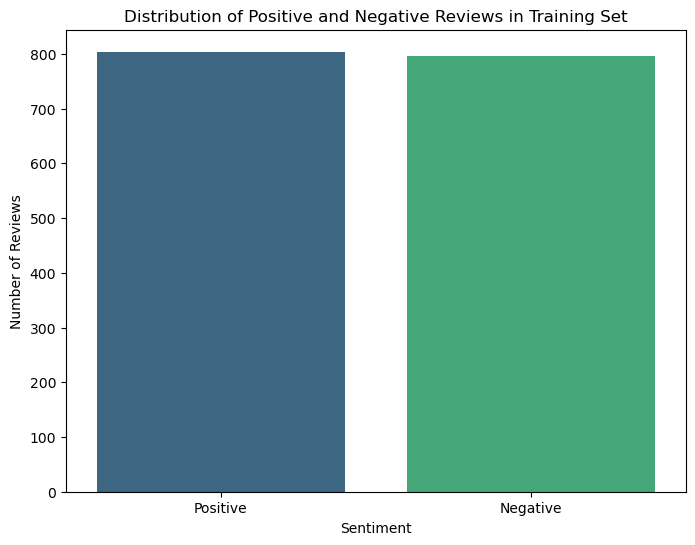

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts, palette='viridis')
plt.title('Distribution of Positive and Negative Reviews in Training Set')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [19]:
def predict_sentiment():
    review = review_entry.get("1.0", tk.END)
    review = clean_text(review)
    review_vectorized = vectorizer.transform([review]).toarray()
    prediction = model.predict(review_vectorized)
    sentiment = 'Positive' if prediction[0] == 1 else 'Negative'
    result_label.config(text=f'Sentiment: {sentiment}')

In [20]:
root = tk.Tk()
root.title("Sentiment Analysis")

# Create and place the widgets
review_label = ttk.Label(root, text="Enter a review:")
review_label.pack(pady=10)
review_entry = tk.Text(root, width=50, height=10)
review_entry.pack(pady=10)

predict_button = ttk.Button(root, text="Predict", command=predict_sentiment)
predict_button.pack(pady=10)

result_label = ttk.Label(root, text="Sentiment: ")
result_label.pack(pady=10)

# Run the application
root.mainloop()